# Aula de projeto - ML em base próxima da realidade

Vamos explorar algumas das técnicas que aprendemos até o momento, aplicando-as ao dataset do projeto final, que é um dataset bem complexo, mais próximo do que encontramos na vida real!

____________

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ml_utils import *

In [3]:
df = pd.read_csv("application_train.csv")

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [5]:
df.shape

(246008, 122)

In [6]:
X = df.drop(columns=["SK_ID_CURR", "TARGET"])
y = df["TARGET"]

In [7]:
y.value_counts(normalize=True)

0    0.918824
1    0.081176
Name: TARGET, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

_________

## EDA

Aqui, deve entrar a EDA, que, como sabemos, é **importantíssima!**

Não deixe de fazer uma boa, longa e cuidadosa análise exploratória, até que você realmente se sinta confortável com o problema e com os dados com os quais estamos trabalhando! Algumas dicas:

- Explore a estrutura da base, os tipos de dados que temos, a distribuição das features numéricas, etc.;
- Formule perguntas sobre a população de interesse, e responda a estas perguntas utilizando as informações que estão na amostra!
- Use e abuse de ferramentas de dataviz (o que inclue o uso de PCA para visualizações em 2D);


> **Importante:** é muito difícil fazer uma análise exploratória de qualidade sem sabermos o que são as colunas de nossa base! Por isso, é importantíssimo que você utilize os **metadados** pra apoiar sua análise -- eles estão no arquivo `HomeCredit_columns_description`.

In [9]:
# faça uma EDA detalhada!

_________

## Feature engineering

Vamos agora criar algumas features qualitativas, utilizando algumas das técnicas mais genéricas que discutimos na aula de feature engineering.

> Mas, lembre-se, este processo só faz sentido se realmente conhecermos a base com a qual estamos trabalhando!! Por isso, não esqueça da EDA!

**Taxas relacionadas à receita**


In [10]:
X_train["AMT_CREDIT"]/X_train["AMT_INCOME_TOTAL"]

28631      2.399077
183632     5.266667
134136     0.666667
12766      3.899315
174805    10.000000
            ...    
132533     8.985000
1407       3.330800
40785      1.497500
80125      4.844800
3211       2.949333
Length: 196806, dtype: float64

In [11]:
X_train["AMT_ANNUITY"]/X_train["AMT_INCOME_TOTAL"]

28631     0.246277
183632    0.296500
134136    0.052667
12766     0.199589
174805    0.347600
            ...   
132533    0.262700
1407      0.127000
40785     0.116600
80125     0.225840
3211      0.233967
Length: 196806, dtype: float64

In [12]:
(X_train["AMT_ANNUITY"]/X_train["AMT_INCOME_TOTAL"]).describe()

count    196799.000000
mean          0.181082
std           0.094410
min           0.003333
25%           0.114985
50%           0.163043
75%           0.229350
max           1.451571
dtype: float64

In [13]:
X_train["AMT_GOODS_PRICE"]/X_train["AMT_INCOME_TOTAL"]

28631      2.307692
183632     4.166667
134136     0.666667
12766      3.424658
174805    10.000000
            ...    
132533     7.500000
1407       2.750000
40785      1.250000
80125      4.000000
3211       2.333333
Length: 196806, dtype: float64

In [14]:
X_train["AMT_INCOME_TOTAL"]/X_train["CNT_FAM_MEMBERS"]

28631     97500.0
183632    18000.0
134136    67500.0
12766     87600.0
174805    60000.0
           ...   
132533    90000.0
1407      90000.0
40785     60000.0
80125     56250.0
3211      45000.0
Length: 196806, dtype: float64

**Tempo empregado como uma porcentagem do tempo de vida**

In [15]:
X_train["DAYS_BIRTH"]/365

28631    -47.136986
183632   -41.200000
134136   -50.071233
12766    -29.887671
174805   -39.589041
            ...    
132533   -56.243836
1407     -54.739726
40785    -43.772603
80125    -24.279452
3211     -30.087671
Name: DAYS_BIRTH, Length: 196806, dtype: float64

In [16]:
X_train["DAYS_EMPLOYED"]

28631      -1946
183632      -128
134136    365243
12766       -325
174805     -3580
           ...  
132533     -2979
1407       -4469
40785      -4260
80125      -1408
3211        -539
Name: DAYS_EMPLOYED, Length: 196806, dtype: int64

In [17]:
X_train["DAYS_EMPLOYED"].apply(lambda x: 0 if x>=0 else x)

28631    -1946
183632    -128
134136       0
12766     -325
174805   -3580
          ... 
132533   -2979
1407     -4469
40785    -4260
80125    -1408
3211      -539
Name: DAYS_EMPLOYED, Length: 196806, dtype: int64

In [18]:
X_train["DAYS_EMPLOYED"].apply(lambda x: 0 if x>=0 else x)/X_train["DAYS_BIRTH"]

28631     0.113107
183632    0.008512
134136   -0.000000
12766     0.029792
174805    0.247751
            ...   
132533    0.145112
1407      0.223674
40785     0.266633
80125     0.158881
3211      0.049080
Length: 196806, dtype: float64

In [19]:
X_train["DAYS_EMPLOYED"]/X_train["DAYS_BIRTH"]

28631      0.113107
183632     0.008512
134136   -19.984844
12766      0.029792
174805     0.247751
            ...    
132533     0.145112
1407       0.223674
40785      0.266633
80125      0.158881
3211       0.049080
Length: 196806, dtype: float64

In [20]:
np.clip(X_train["DAYS_EMPLOYED"]/X_train["DAYS_BIRTH"], 0, 1)

28631     0.113107
183632    0.008512
134136    0.000000
12766     0.029792
174805    0.247751
            ...   
132533    0.145112
1407      0.223674
40785     0.266633
80125     0.158881
3211      0.049080
Length: 196806, dtype: float64

**Número de adultos e crianças na família**


In [21]:
X_train["CNT_FAM_MEMBERS"] - X_train["CNT_CHILDREN"]

28631     2.0
183632    1.0
134136    2.0
12766     2.0
174805    2.0
         ... 
132533    1.0
1407      1.0
40785     2.0
80125     2.0
3211      2.0
Length: 196806, dtype: float64

In [22]:
X_train['CNT_CHILDREN']/X_train['CNT_FAM_MEMBERS']

28631     0.333333
183632    0.666667
134136    0.000000
12766     0.333333
174805    0.333333
            ...   
132533    0.000000
1407      0.000000
40785     0.333333
80125     0.000000
3211      0.333333
Length: 196806, dtype: float64

**Quantidade de pagamentos**

In [23]:
X_train['AMT_CREDIT']/X_train['AMT_ANNUITY']

28631      9.741379
183632    17.762788
134136    12.658228
12766     19.536719
174805    28.768700
            ...    
132533    34.202512
1407      26.226772
40785     12.843053
80125     21.452356
3211      12.605784
Length: 196806, dtype: float64

**Estatísticas sobre dados externos**


In [24]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
28631,0.862670,0.537364,0.735221
183632,NaN,0.484688,NaN
134136,0.558577,0.465365,0.380800
12766,0.330174,0.213449,0.297087
174805,0.629119,0.648341,0.506484
...,...,...,...
132533,NaN,0.162192,0.673830
1407,NaN,0.727673,0.835777
40785,NaN,0.537880,0.665855
80125,0.564393,0.443233,0.508287


In [25]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].min(axis = 1)

28631     0.537364
183632    0.484688
134136    0.380800
12766     0.213449
174805    0.506484
            ...   
132533    0.162192
1407      0.727673
40785     0.537880
80125     0.443233
3211      0.142344
Length: 196806, dtype: float64

In [26]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].max(axis = 1)

28631     0.862670
183632    0.484688
134136    0.558577
12766     0.330174
174805    0.648341
            ...   
132533    0.673830
1407      0.835777
40785     0.665855
80125     0.564393
3211      0.404628
Length: 196806, dtype: float64

In [27]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].mean(axis = 1)

28631     0.711752
183632    0.484688
134136    0.468247
12766     0.280236
174805    0.594648
            ...   
132533    0.418011
1407      0.781725
40785     0.601868
80125     0.505304
3211      0.273486
Length: 196806, dtype: float64

In [28]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].std(axis = 1)

28631     0.163918
183632         NaN
134136    0.088924
12766     0.060160
174805    0.076954
            ...   
132533    0.361783
1407      0.076441
40785     0.090492
80125     0.060635
3211      0.185463
Length: 196806, dtype: float64

In [29]:
X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
28631,0.862670,0.537364,0.735221
183632,NaN,0.484688,NaN
134136,0.558577,0.465365,0.380800
12766,0.330174,0.213449,0.297087
174805,0.629119,0.648341,0.506484
...,...,...,...
132533,NaN,0.162192,0.673830
1407,NaN,0.727673,0.835777
40785,NaN,0.537880,0.665855
80125,0.564393,0.443233,0.508287


In [30]:
(~X_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull()).sum(axis=1)

28631     3
183632    1
134136    3
12766     3
174805    3
         ..
132533    2
1407      2
40785     2
80125     3
3211      2
Length: 196806, dtype: int64

**Número de documentos entregues**


In [31]:
[x for x in X_train.columns if "FLAG_DOCUMENT_" in x]

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [32]:
features_docs = [x for x in X_train.columns if "FLAG_DOCUMENT_" in x]

X_train[features_docs]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
28631,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
183632,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
134136,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12766,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174805,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132533,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1407,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40785,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
80125,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
features_docs = [x for x in X_train.columns if "FLAG_DOCUMENT_" in x]

X_train[features_docs].sum(axis=1)

28631     1
183632    1
134136    1
12766     1
174805    1
         ..
132533    1
1407      1
40785     1
80125     1
3211      1
Length: 196806, dtype: int64

In [34]:
X_train[features_docs].sum(axis=1).value_counts()

1    172936
0     18796
2      4972
3       101
4         1
dtype: int64

**Tipo de dia da data de aplicação**


In [35]:
X_train["WEEKDAY_APPR_PROCESS_START"].value_counts()

TUESDAY      34406
WEDNESDAY    33037
MONDAY       32672
THURSDAY     32400
FRIDAY       32132
SATURDAY     21776
SUNDAY       10383
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [36]:
X_train["WEEKDAY_APPR_PROCESS_START"].apply(lambda x: "Weekend" if x in ["SATURDAY", "SUNDAY"] else "Working day")

28631     Working day
183632        Weekend
134136        Weekend
12766     Working day
174805        Weekend
             ...     
132533        Weekend
1407          Weekend
40785     Working day
80125     Working day
3211      Working day
Name: WEEKDAY_APPR_PROCESS_START, Length: 196806, dtype: object

**Algumas outras razões temporais**

In [37]:
(X_train["OWN_CAR_AGE"]/X_train["DAYS_BIRTH"]).abs()

28631     0.000291
183632         NaN
134136    0.000821
12766          NaN
174805    0.001661
            ...   
132533         NaN
1407           NaN
40785     0.000250
80125          NaN
3211           NaN
Length: 196806, dtype: float64

In [38]:
X_train["DAYS_ID_PUBLISH"] / X_train["DAYS_BIRTH"]

28631     0.042662
183632    0.265328
134136    0.098709
12766     0.238794
174805    0.359170
            ...   
132533    0.198110
1407      0.175325
40785     0.382174
80125     0.075942
3211      0.325077
Length: 196806, dtype: float64

In [39]:
X_train["DAYS_REGISTRATION"] / X_train["DAYS_BIRTH"]

28631     0.452775
183632    0.078867
134136    0.032721
12766     0.060409
174805    0.197993
            ...   
132533    0.469093
1407      0.573774
40785     0.158165
80125     0.341684
3211      0.170825
Length: 196806, dtype: float64

___________________

## Feature engineering na Pipeline

Depois de termos construido as features acima de maneira exploratória, agora podemos incorporar o feature engineering à pipeline!

In [9]:
class FeaturesCreator(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        pass
    
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X, y=None):
        
        X["CREDITO_SOBRE_RECEITA"] = X["AMT_CREDIT"]/X["AMT_INCOME_TOTAL"]
        X["ANUIDADE_SOBRE_RECEITA"] = X["AMT_ANNUITY"]/X["AMT_INCOME_TOTAL"]
        X["BENS_SOBRE_RECEITA"] = X["AMT_GOODS_PRICE"] / X["AMT_INCOME_TOTAL"]
        X["RECEITA_PER_CAPTA"] = X["AMT_INCOME_TOTAL"] / X["CNT_FAM_MEMBERS"]

        # =======================================

        X["PORCAO_DE_VIDA_EMPREGADO"] = np.clip(X["DAYS_EMPLOYED"] / X["DAYS_BIRTH"], 0, 1)

        # =======================================

        X["N_ADULTOS"] = X["CNT_FAM_MEMBERS"] - X["CNT_CHILDREN"]
        X['TAXA_DE_CRIANCAS'] = X['CNT_CHILDREN'] / X['CNT_FAM_MEMBERS']

        # =======================================

        X['QUANTIDADE_DE_PAGAMENTOS'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']

        # =======================================

        X["EXT_SOURCE_MIN"]  = X[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].min(axis = 1)
        X["EXT_SOURCE_MAX"]  = X[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].max(axis = 1)
        X["EXT_SOURCE_MEAN"] = X[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].mean(axis = 1)
        X["EXT_SOURCE_STD"]   = X[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].std(axis = 1)
        X["NUM_EXT_SOURCES"] = (~X[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull()).astype(int).sum(axis=1)

        # =======================================

        features_docs = [x for x in X.columns if "FLAG_DOCUMENT_" in x]
        X["NUM_DOCUMENTOS"] = X[features_docs].sum(axis = 1)

        # =======================================

        X["TIPO_DE_DIA_PEDIDO"] = X["WEEKDAY_APPR_PROCESS_START"].apply(lambda x: "Weekend" if x in ["SATURDAY", "SUNDAY"]
                                                                        else "Working day")

        # =======================================

        X["TEMPO_MOTORIZADO"] = X["OWN_CAR_AGE"] / X["DAYS_BIRTH"]
        X["TAXA_DIAS_PUBLICACAO_ID"] = X["DAYS_ID_PUBLISH"] / X["DAYS_BIRTH"]
        X["TAXA_DIAS_REGISTRO"] = X["DAYS_REGISTRATION"] / X["DAYS_BIRTH"]

        return X

In [10]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns_to_drop):
        
        self.columns_to_drop = columns_to_drop
        
    def fit(self, X, y=None):
        
        return self 

    def transform(self, X, y=None):
        
        return X.drop(columns = self.columns_to_drop)

Vamos criar uma função para incorporar a leitura dos dados + pipeline de pré-processamento que inclui o feature engineering!

In [11]:
def pipe_pre_process_projeto_with_feat_eng(cols_to_drop_not_features=[],
                                           inputer_num_strategy="mean",
                                           encoding="onehot",
                                           scaler=False):
    '''
    pipeline titanic com feature engineering
    
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    - scaler: "ss", "mms" ou False caso não queira scaling
    '''
    
    df_entrega = pd.read_csv("application_test_student.csv")
    X_entrega = df_entrega.copy()

    # ==========================================================
    
    
    df = pd.read_csv("application_train.csv")

    X = df.drop(columns=["TARGET"])
    y = df["TARGET"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================
    # adicionando o passo de feature engineering
    
    pipe_feat_eng = Pipeline([("create_features", FeaturesCreator()),
                              ("column_dropper", ColumnDropper(cols_to_drop_not_features))]).fit(X_train)

    X_train = pipe_feat_eng.transform(X_train)
    X_test = pipe_feat_eng.transform(X_test)
    X_entrega = pipe_feat_eng.transform(X_entrega)
    
    # ==========================================================
    
    passos_features_num = [("input_num", SimpleImputer(strategy=inputer_num_strategy))]
    
    # apenas se scaler não for False
    if scaler:
        
        if scaler == "ss":
            passos_features_num.append(("ss", StandardScaler()))

        elif scaler == "mms":
            passos_features_num.append(("mms", MinMaxScaler()))
            
        else:
            raise ValueError(f"Estratégia de scaling {scaler} não disponível!")
        
    pipe_features_num = Pipeline(passos_features_num)

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()
    
    # ==========================================================

    if encoding == "onehot":
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])    
    else:
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, X_entrega, pre_processador

In [12]:
cols_to_drop = ["SK_ID_CURR", "CODE_GENDER"]

(X_train, X_test, 
 y_train, y_test, 
 X_entrega, 
 pre_processador) = pipe_pre_process_projeto_with_feat_eng(cols_to_drop_not_features=cols_to_drop, 
                                                           inputer_num_strategy="mean",
                                                           encoding="onehot",
                                                           scaler="ss")

In [13]:
pre_processador

ColumnTransformer(transformers=[('transf_num',
                                 Pipeline(steps=[('input_num', SimpleImputer()),
                                                 ('ss', StandardScaler())]),
                                 ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                                  'AMT_CREDIT', 'AMT_ANNUITY',
                                  'AMT_GOODS_PRICE',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                  'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                                  'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
                                  'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                                  'FLAG_WORK_P...
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                                  'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                                  'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                                  'EMERGENCYSTATE_MODE',
                                  'TIPO_DE_DIA_PEDIDO'])])

___________

## Agora sim, é tó treinar o modelo!

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

Métricas de avaliação de treino - com cutoff = 0.50


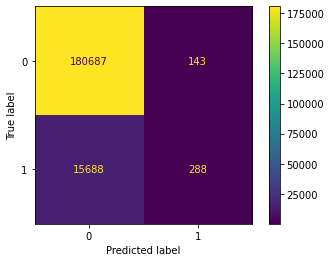

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    180830
           1       0.67      0.02      0.04     15976

    accuracy                           0.92    196806
   macro avg       0.79      0.51      0.50    196806
weighted avg       0.90      0.92      0.88    196806

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: 1                               


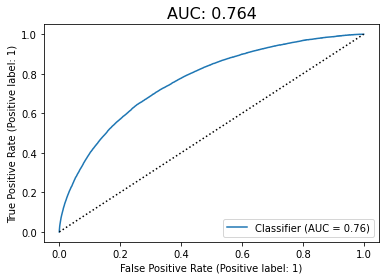


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


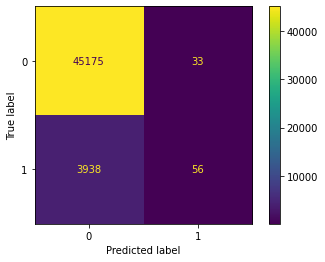

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45208
           1       0.63      0.01      0.03      3994

    accuracy                           0.92     49202
   macro avg       0.77      0.51      0.49     49202
weighted avg       0.90      0.92      0.88     49202

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: 1                               


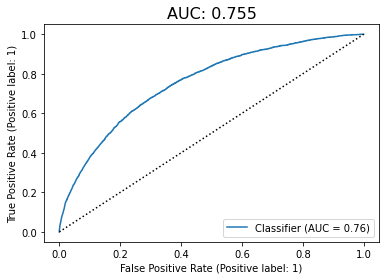

In [46]:
pipe_gb_fe = Pipeline([("pre_processador", pre_processador),
                       ("gb", GradientBoostingClassifier(random_state=42))])

pipe_gb_fe.fit(X_train, y_train)

# ==========================================

_ = clf_metrics_train_test(pipe_gb_fe, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, plot_roc=True, pos_label=1)

___________________

## Vamos testar fazer undersampling 

Além de balancear os dados, isso ajuda a reduzir o tamanho da base!

<img src="https://miro.medium.com/max/1400/1*-9Y4VyZm7OqBYAdKEmAb6w.png" width=600>

Para isso, vamos utilizar as ferramentas da biblioteca [imblearn](https://imbalanced-learn.org/stable/).

Em particular, vamos usar a ferramenta mais simples para o undersampling, o [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).

Para instalar, o de sempre:

`pip install -U imbalanced-learn`

In [47]:
y_train.value_counts()

0    180830
1     15976
Name: TARGET, dtype: int64

In [48]:
y_train.value_counts(normalize=True)

0    0.918824
1    0.081176
Name: TARGET, dtype: float64

In [14]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

Métricas de avaliação de treino - com cutoff = 0.50


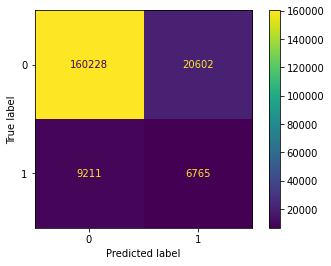

              precision    recall  f1-score   support

           0       0.95      0.89      0.91    180830
           1       0.25      0.42      0.31     15976

    accuracy                           0.85    196806
   macro avg       0.60      0.65      0.61    196806
weighted avg       0.89      0.85      0.87    196806

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: 1                               


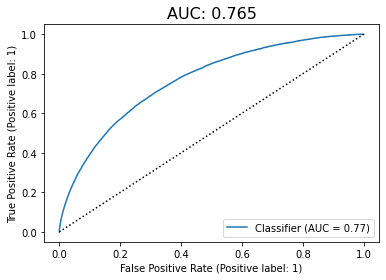


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


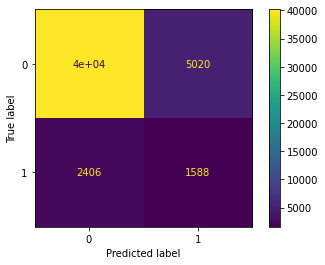

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     45208
           1       0.24      0.40      0.30      3994

    accuracy                           0.85     49202
   macro avg       0.59      0.64      0.61     49202
weighted avg       0.89      0.85      0.87     49202

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: 1                               


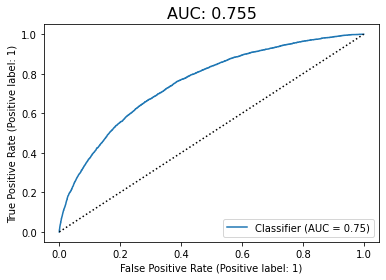

In [15]:
pipe_gb_fe_undersamp = Pipeline([("under_samp", RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
                                 ("pre_processador", pre_processador),
                                 ("gb", GradientBoostingClassifier(random_state=42))])

pipe_gb_fe_undersamp.fit(X_train, y_train)

# ==========================================

_ = clf_metrics_train_test(pipe_gb_fe_undersamp, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, plot_roc=True, pos_label=1)

Um resultado muito bom, 0.755 de AUC no teste (e isso sem fazer otimização de hiperparâmetros!)

Vamos salvar este modelo (que no caso é a pipeline completa!), pra gente não precisar ficar rodando toda vez!

In [16]:
import joblib

In [17]:
joblib.dump(pipe_gb_fe_undersamp, "meu_modelo.joblib")

['meu_modelo.joblib']

____________

## Formato da entrega

Lembrando as instruções que estão no enunciado:

Deve ser entregue um arquivo csv com as **predições** para a base de teste (`aplication_test_student.csv`).

Essa base deverá ser um Data Frame com duas colunas: a primeira sendo o **SK_ID_CURR** e a segunda a **probabilidade de inadimplência.**

As features `X_entrega` foram lidas e retornadas pela função que fizemos acima, `pipe_pre_process_projeto_with_feat_eng`, pra garantir que elas já tenham passado pela pipeline de feature engineering!

Então agora é só usar estas features, passar pro modelo que já foi treinado, e pegar o `predict_proba()`!

Vamos emular o procedimento de ler o modelo que já foi treinado anteriormente

In [19]:
meu_modelo_lido = joblib.load("meu_modelo.joblib")

meu_modelo_lido

Pipeline(steps=[('under_samp',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.5)),
                ('pre_processador',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'D...
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE',
                                                   'FONDKAPREMONT_MODE',
                                                   'HOUSETYPE_MODE',
                                                   'WALLSMATERIAL_MODE',
                                                   'EMERGENCYSTATE_MODE',
                                                   'TIPO_DE_DIA_PEDIDO'])])),
                ('gb', GradientBoostingClassifier(random_state=42))])

In [20]:
meu_modelo_lido.classes_

array([0, 1], dtype=int64)

In [21]:
y_probs_entrega = meu_modelo_lido.predict_proba(X_entrega)[:, 1]

In [23]:
y_probs_entrega

array([0.64641994, 0.16585562, 0.33387648, ..., 0.17691056, 0.31988464,
       0.248679  ])

In [24]:
df_entrega = pd.read_csv("application_test_student.csv")

df_entrega["SK_ID_CURR"]

0        149741
1        363290
2        436006
3        377703
4        188624
          ...  
61498    102817
61499    343961
61500    427828
61501    405956
61502    425814
Name: SK_ID_CURR, Length: 61503, dtype: int64

In [25]:
entrega = pd.DataFrame({"SK_ID_CURR" : df_entrega["SK_ID_CURR"],
                        "proba": y_probs_entrega})

entrega

,SK_ID_CURR,proba
0,149741,0.646420
1,363290,0.165856
2,436006,0.333876
3,377703,0.206049
4,188624,0.650230
...,...,...
61498,102817,0.250371
61499,343961,0.370276
61500,427828,0.176911
61501,405956,0.319885


In [26]:
entrega.to_csv("probabilidades_entrega.csv", index=False)

E é isso! Agora é com vocês, entrem no ciclo de modelagem, aplique as técnicas que aprendemos até aqui, e entrege um resultado bem legal! :D